In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
neighbourhood_data = gpd.read_file('neighbourhoods.geojson')
neighbourhood_data.head()

,neighbourhood,neighbourhood_group,geometry
0,78739,None,"MULTIPOLYGON (((-97.89002 30.20941, -97.88929 ..."
1,78754,None,"MULTIPOLYGON (((-97.63658 30.40266, -97.63754 ..."
2,78732,None,"MULTIPOLYGON (((-97.87303 30.43806, -97.87335 ..."
3,78737,None,"MULTIPOLYGON (((-98.01876 30.24167, -98.01617 ..."
4,78756,None,"MULTIPOLYGON (((-97.72792 30.32906, -97.72760 ..."


In [3]:
neighbourhood_data.drop(['neighbourhood_group'], axis=1, inplace = True)

In [4]:
neighbourhood_data.head()

,neighbourhood,geometry
0,78739,"MULTIPOLYGON (((-97.89002 30.20941, -97.88929 ..."
1,78754,"MULTIPOLYGON (((-97.63658 30.40266, -97.63754 ..."
2,78732,"MULTIPOLYGON (((-97.87303 30.43806, -97.87335 ..."
3,78737,"MULTIPOLYGON (((-98.01876 30.24167, -98.01617 ..."
4,78756,"MULTIPOLYGON (((-97.72792 30.32906, -97.72760 ..."


In [5]:
neighbourhood_data['neighbourhood'].duplicated().any()

False

In [6]:
neighbourhood_data.set_index('neighbourhood', inplace = True)

In [7]:
import pandas as pd

In [8]:
listings = pd.read_csv('listings.csv')

In [9]:
listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2265,Zen-East in the Heart of Austin (monthly rental),2466,Paddy,NaN,78702,30.27750,-97.71398,Entire home/apt,200,7,24,2019-03-16,0.17,3,131
1,5245,"Eco friendly, Colorful, Clean, Cozy monthly share",2466,Paddy,NaN,78702,30.27577,-97.71379,Private room,114,30,9,2018-03-14,0.06,3,0
2,5456,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,NaN,78702,30.26112,-97.73448,Entire home/apt,104,2,543,2021-02-01,3.74,1,354
3,5636,"Soco, Barton Springs Private Guest Cottage",7148,Peggy,NaN,78704,30.24630,-97.76361,Entire home/apt,46,30,21,2020-11-06,0.15,2,67
4,5769,NW Austin Room,8186,Elizabeth,NaN,78729,30.45697,-97.78422,Private room,39,1,259,2021-02-10,1.96,1,79


In [10]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10272 entries, 0 to 10271
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              10272 non-null  int64  
 1   name                            10272 non-null  object 
 2   host_id                         10272 non-null  int64  
 3   host_name                       10267 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   10272 non-null  int64  
 6   latitude                        10272 non-null  float64
 7   longitude                       10272 non-null  float64
 8   room_type                       10272 non-null  object 
 9   price                           10272 non-null  int64  
 10  minimum_nights                  10272 non-null  int64  
 11  number_of_reviews               10272 non-null  int64  
 12  last_review                     

In [11]:
listings.describe()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.027200e+04,1.027200e+04,0.0,10272.000000,10272.000000,10272.000000,10272.000000,10272.000000,10272.000000,7672.000000,10272.000000,10272.000000
mean,2.604226e+07,9.482466e+07,NaN,78723.162481,30.281591,-97.752913,255.656542,8.240654,31.720600,1.280021,19.581192,122.290401
std,1.500293e+07,1.111380e+08,NaN,20.827207,0.061041,0.058415,513.284268,23.416609,68.107864,1.697720,67.081990,138.467978
min,2.265000e+03,2.300000e+01,NaN,78701.000000,30.078870,-98.056630,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.319740e+07,1.098138e+07,NaN,78704.000000,30.245162,-97.770485,82.000000,1.000000,0.000000,0.160000,1.000000,0.000000
50%,2.580636e+07,4.428986e+07,NaN,78722.000000,30.270175,-97.745035,136.000000,2.000000,5.000000,0.650000,1.000000,59.000000
75%,4.006138e+07,1.410198e+08,NaN,78745.000000,30.305238,-97.721430,250.000000,3.000000,29.000000,1.790000,4.000000,263.250000
max,4.811152e+07,3.879780e+08,NaN,78759.000000,30.515280,-97.560620,16264.000000,999.000000,951.000000,34.030000,358.000000,365.000000


In [12]:
listings['neighbourhood'].unique()

array([78702, 78704, 78729, 78759, 78741, 78703, 78757, 78727, 78731,
       78758, 78744, 78705, 78722, 78725, 78701, 78751, 78723, 78752,
       78736, 78732, 78746, 78745, 78754, 78730, 78724, 78753, 78756,
       78749, 78735, 78721, 78734, 78739, 78733, 78737, 78748, 78738,
       78726, 78717, 78750, 78728, 78712, 78742, 78747, 78719],
      dtype=int64)

In [13]:
listings['neighbourhood'].duplicated().any()

True

In [14]:
new_listings = listings.groupby(['neighbourhood']).count()\
    .rename(columns={"id":"count"})

In [15]:
new_listings = new_listings['count']
new_listings.head()

neighbourhood
78701     713
78702    1263
78703     530
78704    1822
78705     505
Name: count, dtype: int64

In [16]:
new_listings = pd.DataFrame(data=new_listings)
new_listings.index = new_listings.index.astype(int)
new_listings.head()

,count
neighbourhood,
78701,713
78702,1263
78703,530
78704,1822
78705,505


In [17]:
neighbourhood_data.sort_index(inplace=True)
neighbourhood_data.index = neighbourhood_data.index.astype(int)
neighbourhood_data.head()

,geometry
neighbourhood,
78701,"MULTIPOLYGON (((-97.73599 30.25101, -97.73589 ..."
78702,"MULTIPOLYGON (((-97.69186 30.24848, -97.69172 ..."
78703,"MULTIPOLYGON (((-97.76606 30.31295, -97.76482 ..."
78704,"MULTIPOLYGON (((-97.75447 30.26507, -97.75410 ..."
78705,"MULTIPOLYGON (((-97.72978 30.29871, -97.72893 ..."


In [18]:
neighbourhood_data.index.dtype

dtype('int64')

In [19]:
new_listings.index.dtype

dtype('int64')

In [20]:
merged = pd.merge(neighbourhood_data, new_listings, left_index =True, right_index =True, how = 'inner')

In [21]:
merged.sort_values('count', ascending= False)

,geometry,count
neighbourhood,,
78704,"MULTIPOLYGON (((-97.75447 30.26507, -97.75410 ...",1822
78702,"MULTIPOLYGON (((-97.69186 30.24848, -97.69172 ...",1263
78701,"MULTIPOLYGON (((-97.73599 30.25101, -97.73589 ...",713
78741,"MULTIPOLYGON (((-97.70652 30.25024, -97.70628 ...",622
78703,"MULTIPOLYGON (((-97.76606 30.31295, -97.76482 ...",530
78745,"MULTIPOLYGON (((-97.79207 30.23183, -97.78922 ...",513
78705,"MULTIPOLYGON (((-97.72978 30.29871, -97.72893 ...",505
78751,"MULTIPOLYGON (((-97.70677 30.32211, -97.70693 ...",478
78723,"MULTIPOLYGON (((-97.66540 30.28564, -97.66595 ...",313


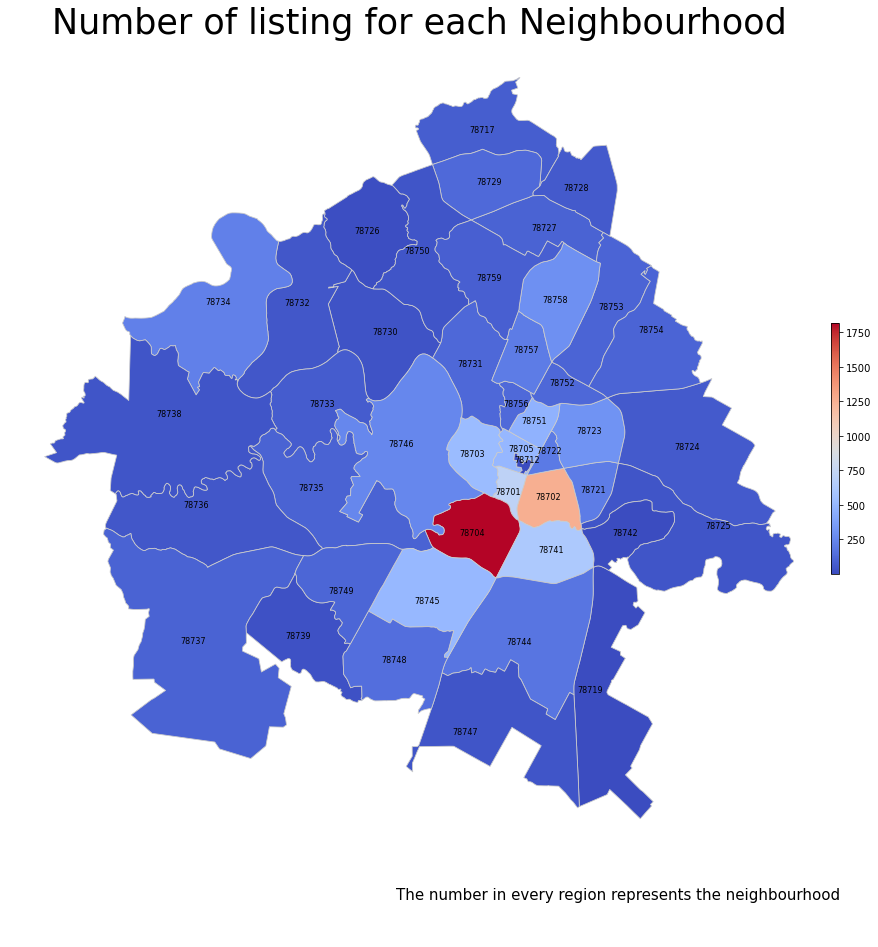

In [22]:
vmin, vmax = merged['count'].min(), merged['count'].max()
fig, ax = plt.subplots(1, figsize=(15, 15))
ax.axis('off')
ax.set_title('Number of listing for each Neighbourhood', fontdict={'fontsize': '35', 'fontweight' : '3'})
ax.annotate('The number in every region represents the neighbourhood', xy=(0.45, .05), xycoords='figure fraction', fontsize=15, color='black')
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
fig.colorbar(sm, orientation="vertical", fraction=0.01, pad=0, aspect = 30)
merged.plot(column='count', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8')
merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[:])
merged['coords'] = [coords[0] for coords in merged['coords']]
for idx, row in merged.iterrows():
    plt.annotate(str(idx), xy=row['coords'],horizontalalignment='center', fontsize = 8)

In [23]:
listings['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [24]:
Entire_home = listings[listings['room_type'] == 'Entire home/apt'][['neighbourhood','room_type']]
Private_room = listings[listings['room_type'] == 'Private room'][['neighbourhood','room_type']]
Hotel_room = listings[listings['room_type'] == 'Hotel room'][['neighbourhood','room_type']]
Shared_room = listings[listings['room_type'] == 'Shared room'][['neighbourhood','room_type']]

In [25]:
Entire_home = Entire_home.groupby('neighbourhood').count()\
        .rename(columns={"room_type":"count"})
Private_room = Private_room.groupby('neighbourhood').count()\
        .rename(columns={"room_type":"count"})
Hotel_room = Hotel_room.groupby('neighbourhood').count()\
        .rename(columns={"room_type":"count"})
Shared_room = Shared_room.groupby('neighbourhood').count()\
        .rename(columns={"room_type":"count"})

In [26]:
Entire_home.count()

count    44
dtype: int64

In [27]:
Private_room.count()

count    43
dtype: int64

In [28]:
Hotel_room.count()

count    5
dtype: int64

In [29]:
Shared_room.count()

count    27
dtype: int64

In [30]:
Entire_home.head()

,count
neighbourhood,
78701,644
78702,1065
78703,475
78704,1589
78705,345


In [31]:
Hotel_room = Hotel_room.join(neighbourhood_data,how = 'right')

In [32]:
Hotel_room

,count,geometry
neighbourhood,,
78701,6.0,"MULTIPOLYGON (((-97.73599 30.25101, -97.73589 ..."
78702,NaN,"MULTIPOLYGON (((-97.69186 30.24848, -97.69172 ..."
78703,NaN,"MULTIPOLYGON (((-97.76606 30.31295, -97.76482 ..."
78704,1.0,"MULTIPOLYGON (((-97.75447 30.26507, -97.75410 ..."
78705,NaN,"MULTIPOLYGON (((-97.72978 30.29871, -97.72893 ..."
78712,NaN,"MULTIPOLYGON (((-97.73366 30.28536, -97.73295 ..."
78717,NaN,"MULTIPOLYGON (((-97.70740 30.47482, -97.70753 ..."
78719,NaN,"MULTIPOLYGON (((-97.65158 30.20143, -97.65287 ..."
78721,NaN,"MULTIPOLYGON (((-97.66540 30.28564, -97.66598 ..."


In [33]:
Hotel_room.replace(np.nan, 0.0, inplace = True)

In [34]:
Hotel_room.count()

count       44
geometry    44
dtype: int64

In [35]:
Hotel_room = gpd.GeoDataFrame(Hotel_room)

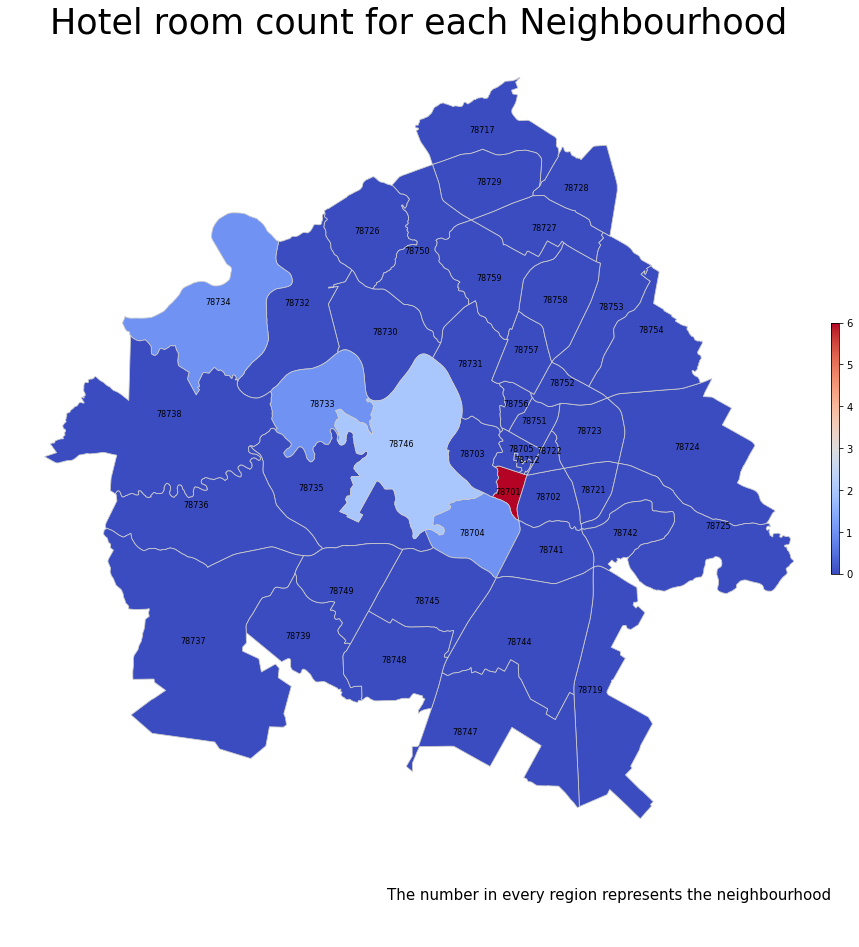

In [36]:
vmin, vmax = Hotel_room['count'].min(), Hotel_room['count'].max()
fig, ax = plt.subplots(1, figsize=(15, 15))
ax.axis('off')
ax.set_title('Hotel room count for each Neighbourhood', fontdict={'fontsize': '35', 'fontweight' : '3'})
ax.annotate('The number in every region represents the neighbourhood', xy=(0.45, .05), xycoords='figure fraction', fontsize=15, color='black')
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
fig.colorbar(sm, orientation="vertical", fraction=0.01, pad=0, aspect = 30)
Hotel_room.plot(column='count', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8')
Hotel_room['coords'] = Hotel_room['geometry'].apply(lambda x: x.representative_point().coords[:])
Hotel_room['coords'] = [coords[0] for coords in Hotel_room['coords']]
for idx, row in Hotel_room.iterrows():
    plt.annotate(str(idx), xy=row['coords'],horizontalalignment='center', fontsize = 8)

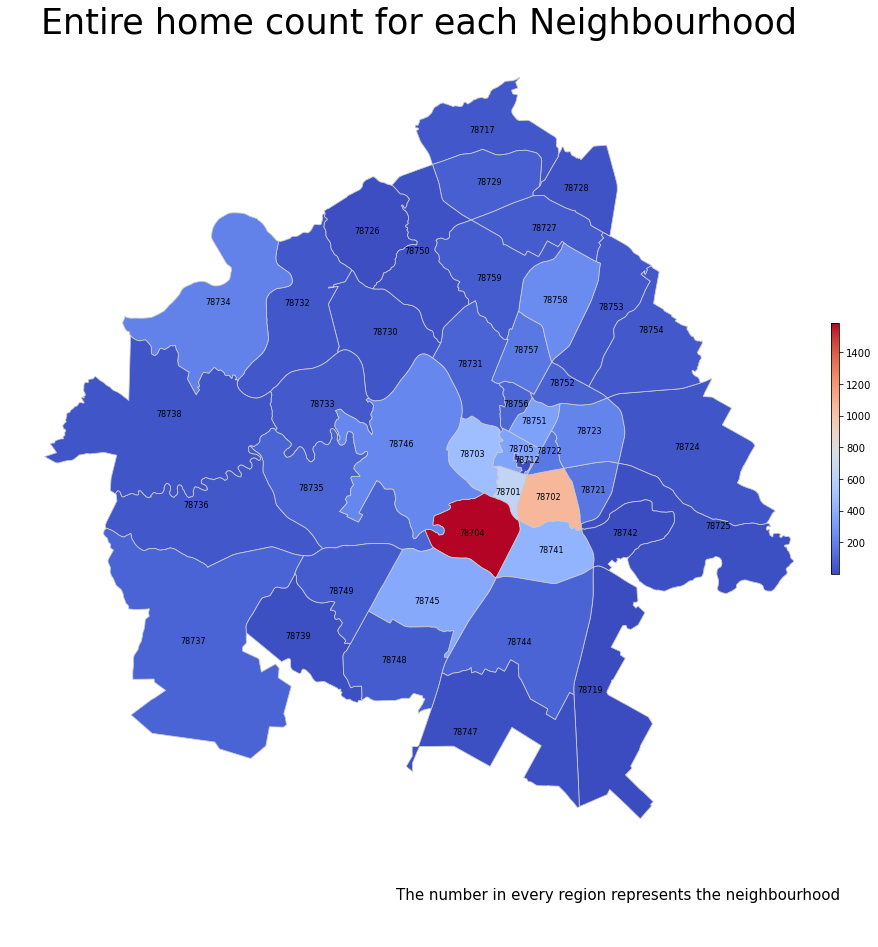

In [37]:
Entire_home = Entire_home.join(neighbourhood_data,how = 'right')
Entire_home.replace(np.nan, 0.0, inplace = True)
Entire_home = gpd.GeoDataFrame(Entire_home)
vmin, vmax = Entire_home['count'].min(), Entire_home['count'].max()
fig, ax = plt.subplots(1, figsize=(15, 15))
ax.axis('off')
ax.set_title('Entire home count for each Neighbourhood', fontdict={'fontsize': '35', 'fontweight' : '3'})
ax.annotate('The number in every region represents the neighbourhood', xy=(0.45, .05), xycoords='figure fraction', fontsize=15, color='black')
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
fig.colorbar(sm, orientation="vertical", fraction=0.01, pad=0, aspect = 30)
Entire_home.plot(column='count', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8')
Entire_home['coords'] = Entire_home['geometry'].apply(lambda x: x.representative_point().coords[:])
Entire_home['coords'] = [coords[0] for coords in Entire_home['coords']]
for idx, row in Entire_home.iterrows():
    plt.annotate(str(idx), xy=row['coords'],horizontalalignment='center', fontsize = 8)

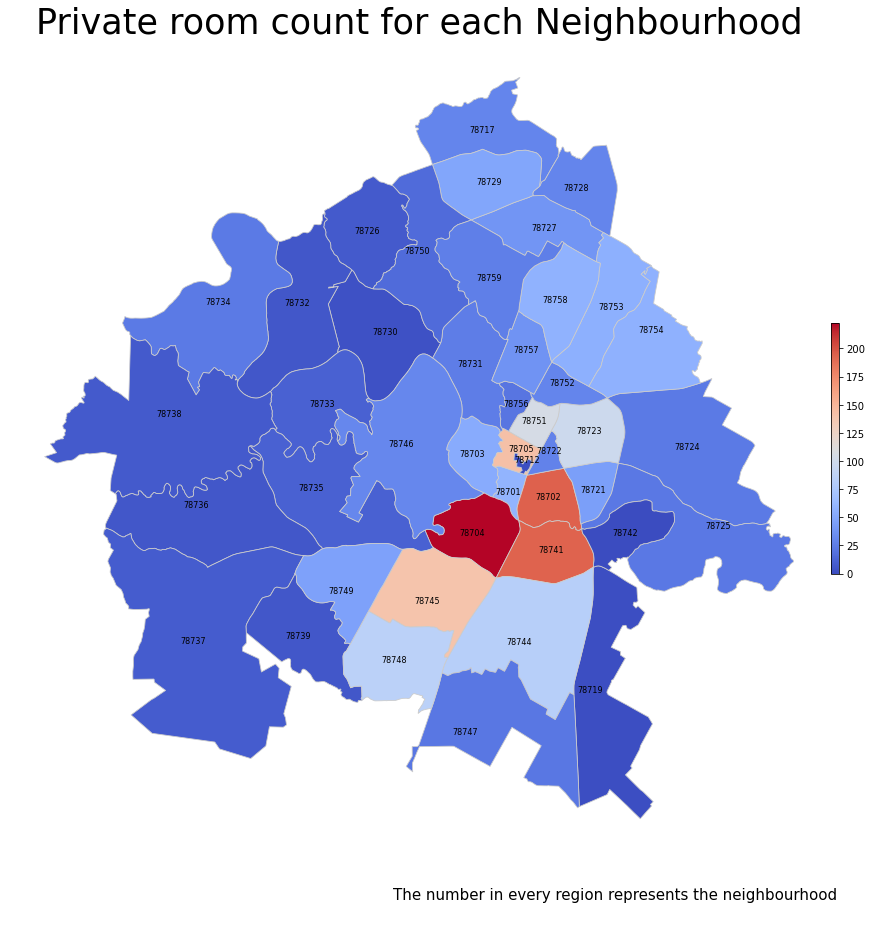

In [38]:
Private_room = Private_room.join(neighbourhood_data,how = 'right')
Private_room.replace(np.nan, 0.0, inplace = True)
Private_room = gpd.GeoDataFrame(Private_room)
vmin, vmax = Private_room['count'].min(), Private_room['count'].max()
fig, ax = plt.subplots(1, figsize=(15, 15))
ax.axis('off')
ax.set_title('Private room count for each Neighbourhood', fontdict={'fontsize': '35', 'fontweight' : '3'})
ax.annotate('The number in every region represents the neighbourhood', xy=(0.45, .05), xycoords='figure fraction', fontsize=15, color='black')
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
fig.colorbar(sm, orientation="vertical", fraction=0.01, pad=0, aspect = 30)
Private_room.plot(column='count', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8')
Private_room['coords'] = Private_room['geometry'].apply(lambda x: x.representative_point().coords[:])
Private_room['coords'] = [coords[0] for coords in Private_room['coords']]
for idx, row in Private_room.iterrows():
    plt.annotate(str(idx), xy=row['coords'],horizontalalignment='center', fontsize = 8)

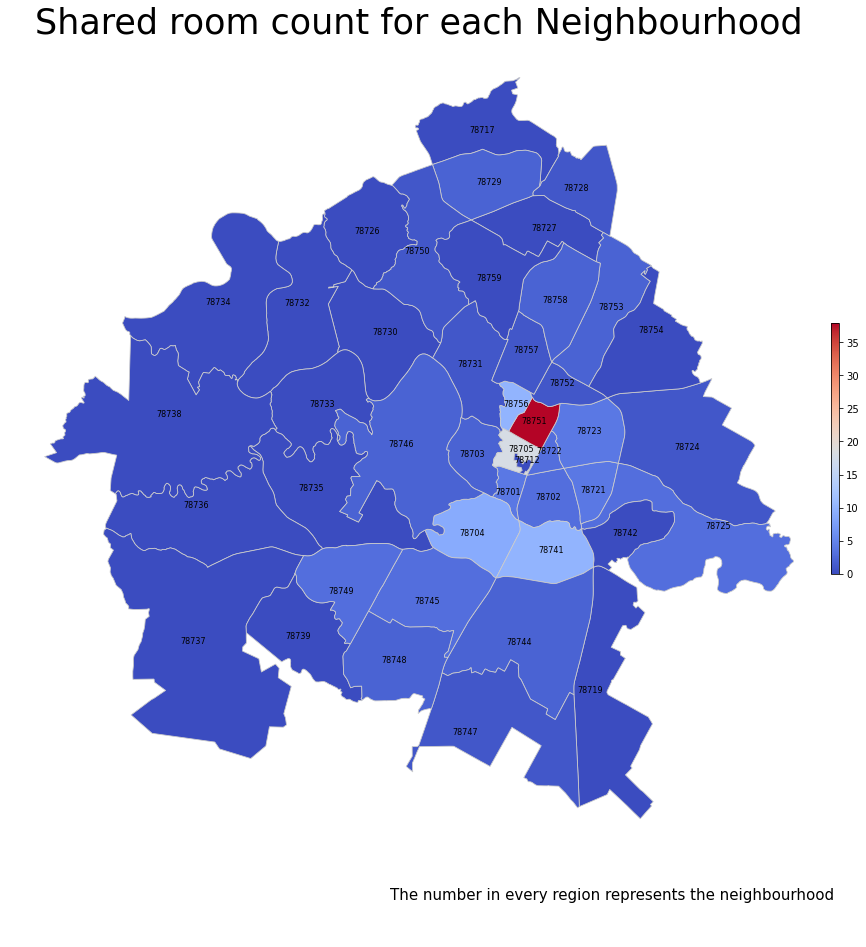

In [39]:
Shared_room = Shared_room.join(neighbourhood_data,how = 'right')
Shared_room.replace(np.nan, 0.0, inplace = True)
Shared_room = gpd.GeoDataFrame(Shared_room)
vmin, vmax = Shared_room['count'].min(), Shared_room['count'].max()
fig, ax = plt.subplots(1, figsize=(15, 15))
ax.axis('off')
ax.set_title('Shared room count for each Neighbourhood', fontdict={'fontsize': '35', 'fontweight' : '3'})
ax.annotate('The number in every region represents the neighbourhood', xy=(0.45, .05), xycoords='figure fraction', fontsize=15, color='black')
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
fig.colorbar(sm, orientation="vertical", fraction=0.01, pad=0, aspect = 30)
Shared_room.plot(column='count', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8')
Shared_room['coords'] = Shared_room['geometry'].apply(lambda x: x.representative_point().coords[:])
Shared_room['coords'] = [coords[0] for coords in Shared_room['coords']]
for idx, row in Shared_room.iterrows():
    plt.annotate(str(idx), xy=row['coords'],horizontalalignment='center', fontsize = 8)